# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [3]:
X_train = np.load('../data/X_train.npy')
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
# X_train_selected_indices = np.load('../data/X_train_selected_indices.npy')
y_train = np.load('../data/y_train.npy')

# Model Training

In [4]:
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 7, 15, 30],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100],
    'p': [1, 2],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [10, 50, 100],
                         'n_neighbors': [3, 7, 15, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [5]:
print(f"Best parameters: {grid_search.best_params_}")
model = grid_search.best_estimator_
model.fit(X_train, y_train)

Best parameters: {'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}


KNeighborsRegressor(leaf_size=10, n_neighbors=30, p=1, weights='distance')

In [12]:
param_grid = {
    'n_neighbors': [30, 50, 100],
    'weights': ['uniform', 'distance'],
    'leaf_size': [3, 5, 10],
    'p': [1, 2],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(leaf_size=10, n_neighbors=30, p=1,
                                           weights='distance'),
             n_jobs=-1,
             param_grid={'leaf_size': [3, 5, 10], 'n_neighbors': [30, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [13]:
print(f"Best parameters: {grid_search.best_params_}")
model = grid_search.best_estimator_
model.fit(X_train, y_train)

Best parameters: {'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}


KNeighborsRegressor(leaf_size=10, n_neighbors=30, p=1, weights='distance')

In [15]:
model_all_indices = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 7, 15, 30],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100],
    'p': [1, 2],
}

grid_search = GridSearchCV(model_all_indices, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_all_indices, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [10, 50, 100],
                         'n_neighbors': [3, 7, 15, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [16]:
print(f"Best parameters: {grid_search.best_params_}")
model_all_indices = grid_search.best_estimator_
model_all_indices.fit(X_train_all_indices, y_train)

Best parameters: {'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}


KNeighborsRegressor(leaf_size=10, n_neighbors=30, p=1, weights='distance')

# Model Evaluation

In [6]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
# X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [17]:
y_pred = model.predict(X_test)
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)
# y_pred_selected_indices = model_selected_indices.predict(X_test_selected_indices)

In [18]:
results = pd.DataFrame(columns=['Model', 'MAE'])
results.loc[0] = ['KNN', mean_absolute_error(y_test, y_pred)]
results.loc[1] = ['KNN All Indices', mean_absolute_error(y_test, y_pred_all_indices)]
# results.loc[2] = ['Linear Regression Selected Indices', mean_absolute_error(y_test, y_pred_selected_indices)]
results

,Model,MAE
0,KNN,4.770458
1,KNN All Indices,4.847478


## Visualization of True Labels vs. Predictions

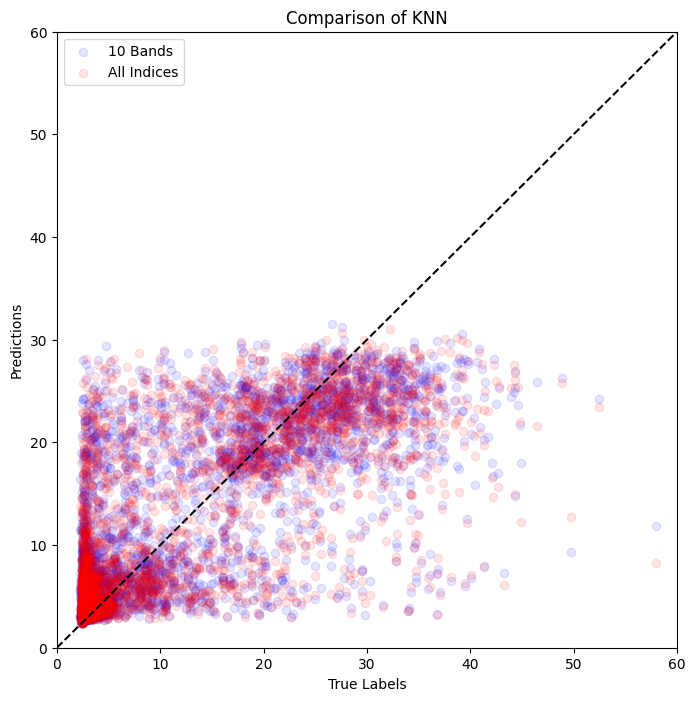

In [20]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
# plt.scatter(y_pred_selected_indices, y_test, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of KNN")
plt.legend()

plt.show()

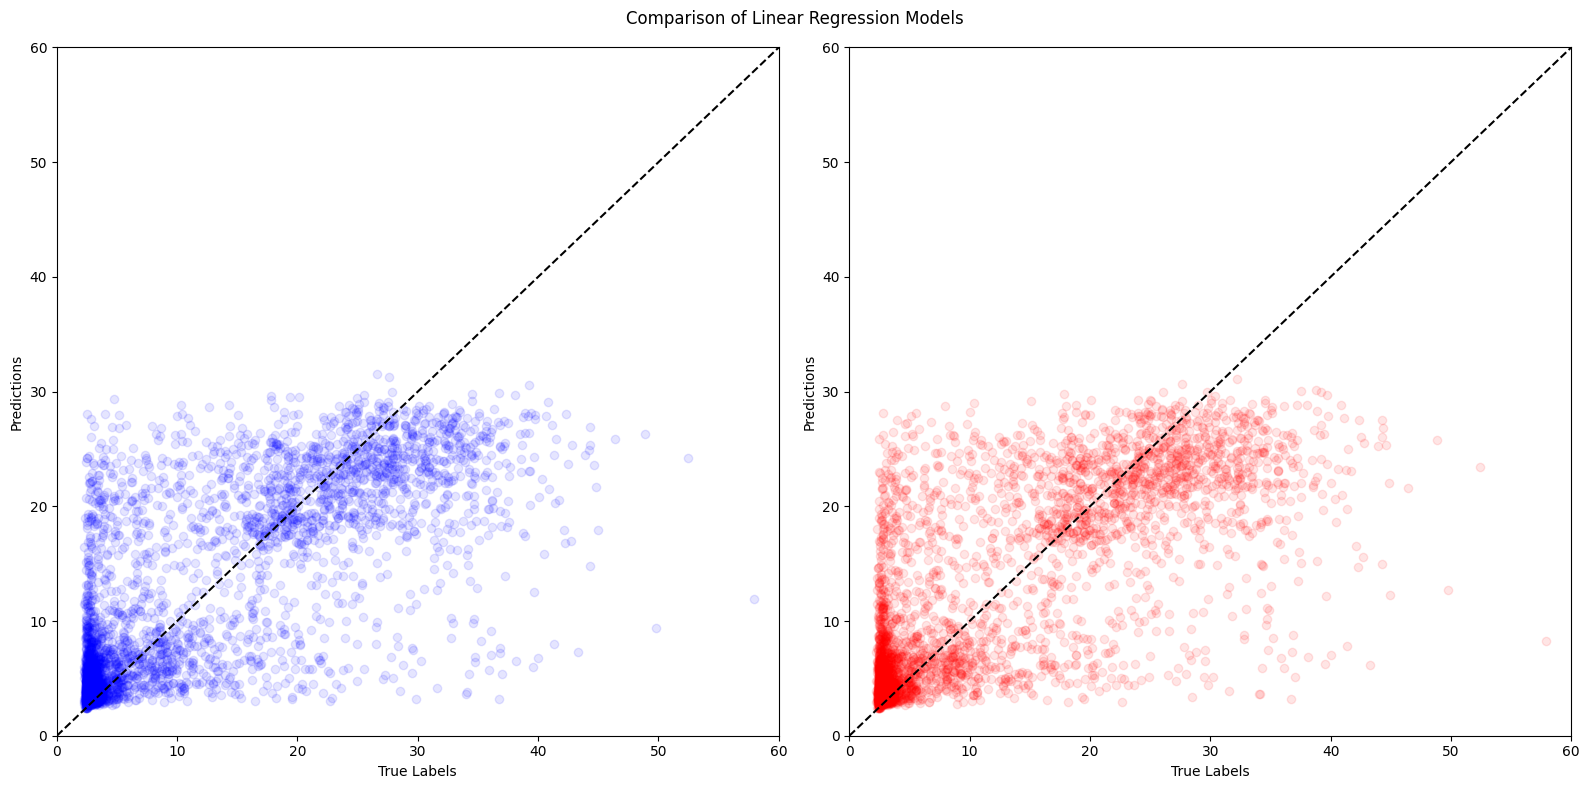

In [19]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
# plt.sublot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
# plt.sublot(1, 3, 2)
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

# plt.subplot(1, 3, 3)
# plt.scatter(y_pred_selected_indices, y_test, color="green", alpha=0.1)
# plt.plot([0, 60], [0, 60], color='black', linestyle='--')
# plt.ylim([0, 60])
# plt.xlim([0, 60])
# plt.xlabel("True Labels")
# plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()